In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_wahlergebnisse = pd.read_excel('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Sentiment_In_Session/bundestagswahlergebnisse/budenstagswahlergebnisse.xlsx', engine='openpyxl')  # If you have an .xlsx file

In [6]:
df_sentiment = pd.read_csv('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Sentiment_In_Session/Final_DF/sentiment_analysis_all.csv')

In [8]:
# Convert 'Jahr' to a string if it's not already
df_wahlergebnisse['Jahr'] = df_wahlergebnisse['Jahr'].astype(str)

# Set 'Jahr' as the index for plotting
df_wahlergebnisse.set_index('Jahr', inplace=True)

# Sort the DataFrame based on the index to ensure the years are in ascending order for plotting
df_wahlergebnisse.sort_index(ascending=True, inplace=True)

In [9]:
df_wahlergebnisse.drop(columns='Sonstige', inplace = True)

In [26]:
df_sentiment['Fraktion_x'] = df_sentiment['Fraktion_x'].replace('Bündnis 90/Die Grünen', 'Die Grünen')

# Right datatypes

In [14]:
df_sentiment.dtypes

Unnamed: 0              int64
Sitzung                 int64
Date           datetime64[ns]
Start                  object
Schluss                object
Speaker                object
Text_Spoken            object
Reactions              object
Name                   object
Fraktion_x             object
Position               object
Wahlperiode           float64
positive              float64
negative              float64
neutral               float64
dtype: object

In [13]:
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])

# Lets make Line Graph

# Lets try some Sentiment Analysis:

## General Trend

In [ ]:
df_sentiment

In [15]:
average_sent_over_time_pos = df_sentiment.groupby(df_sentiment.Date.dt.year)['positive'].mean()
average_sent_over_time_neg = df_sentiment.groupby(df_sentiment.Date.dt.year)['negative'].mean()
average_sent_over_time_neu = df_sentiment.groupby(df_sentiment.Date.dt.year)['neutral'].mean()

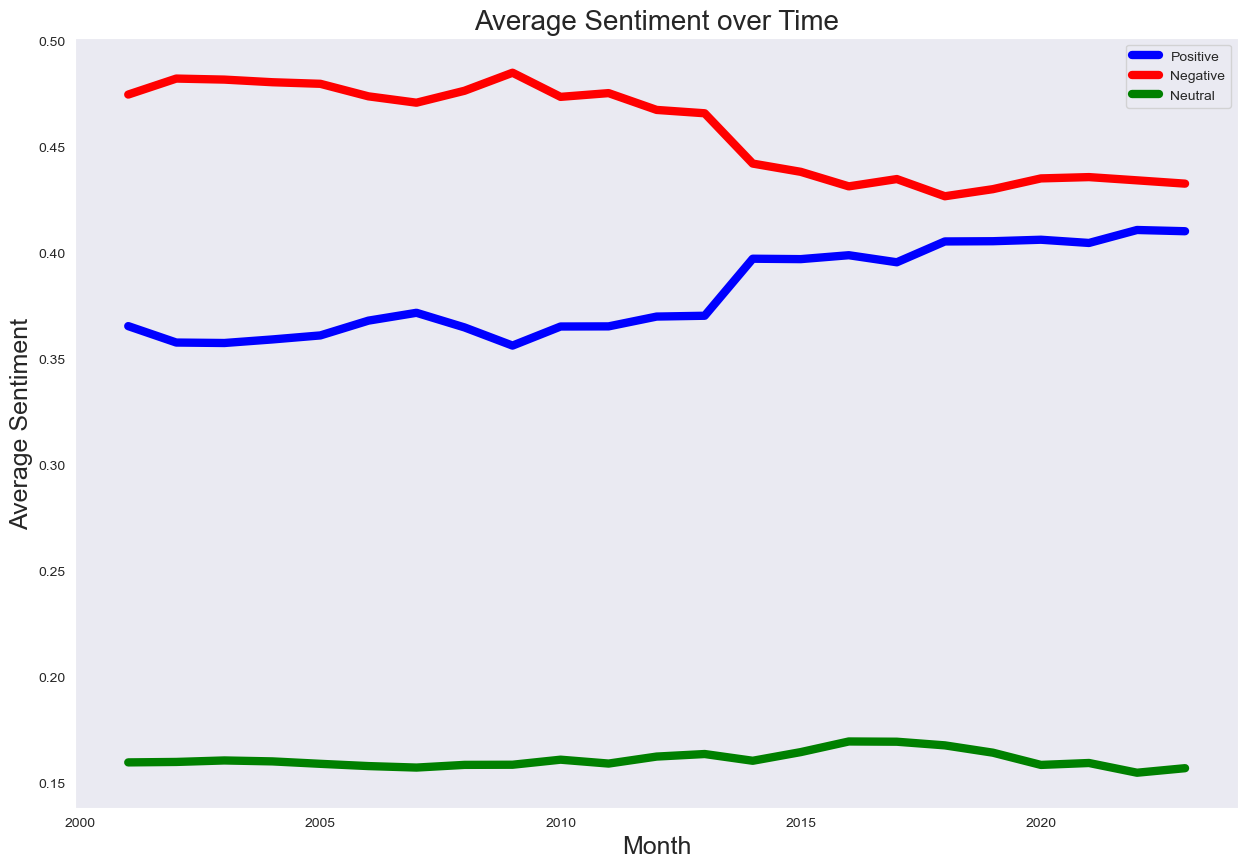

In [18]:
# Define colors for each sentiment
pos_color = 'blue'
neg_color = 'red'
neu_color = 'green'

# Create line plots for each sentiment
plt.figure(figsize=(15, 10))
plt.plot(average_sent_over_time_pos, color=pos_color, label='Positive', linewidth = '6')
plt.plot(average_sent_over_time_neg, color=neg_color, label='Negative', linewidth = '6')
plt.plot(average_sent_over_time_neu, color=neu_color, label='Neutral', linewidth = '6')
# Remove grid
plt.grid(False)

# Add title, labels, and legend
plt.title("Average Sentiment over Time", fontsize= 20)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Average Sentiment", fontsize = 18)
plt.legend()

# Show the plot
plt.show()

# Trend in each Party

In [30]:
# Group by year and 'Fraktion_x' and calculate the mean for each sentiment
average_sent_over_time_pos_party = df_sentiment.groupby([df_sentiment.Date.dt.year, 'Fraktion_x'])['positive'].mean()
average_sent_over_time_neg_party = df_sentiment.groupby([df_sentiment.Date.dt.year, 'Fraktion_x'])['negative'].mean()
average_sent_over_time_neu_party = df_sentiment.groupby([df_sentiment.Date.dt.year, 'Fraktion_x'])['neutral'].mean()

In [28]:
df_sentiment['Fraktion_x'].unique()

array(['FDP', 'fraktionslos', 'SPD', 'Die Linke', 'Die Grünen', 'CSU',
       'AfD', 'CDU', 'PDS', 'LKR', 'SSW'], dtype=object)

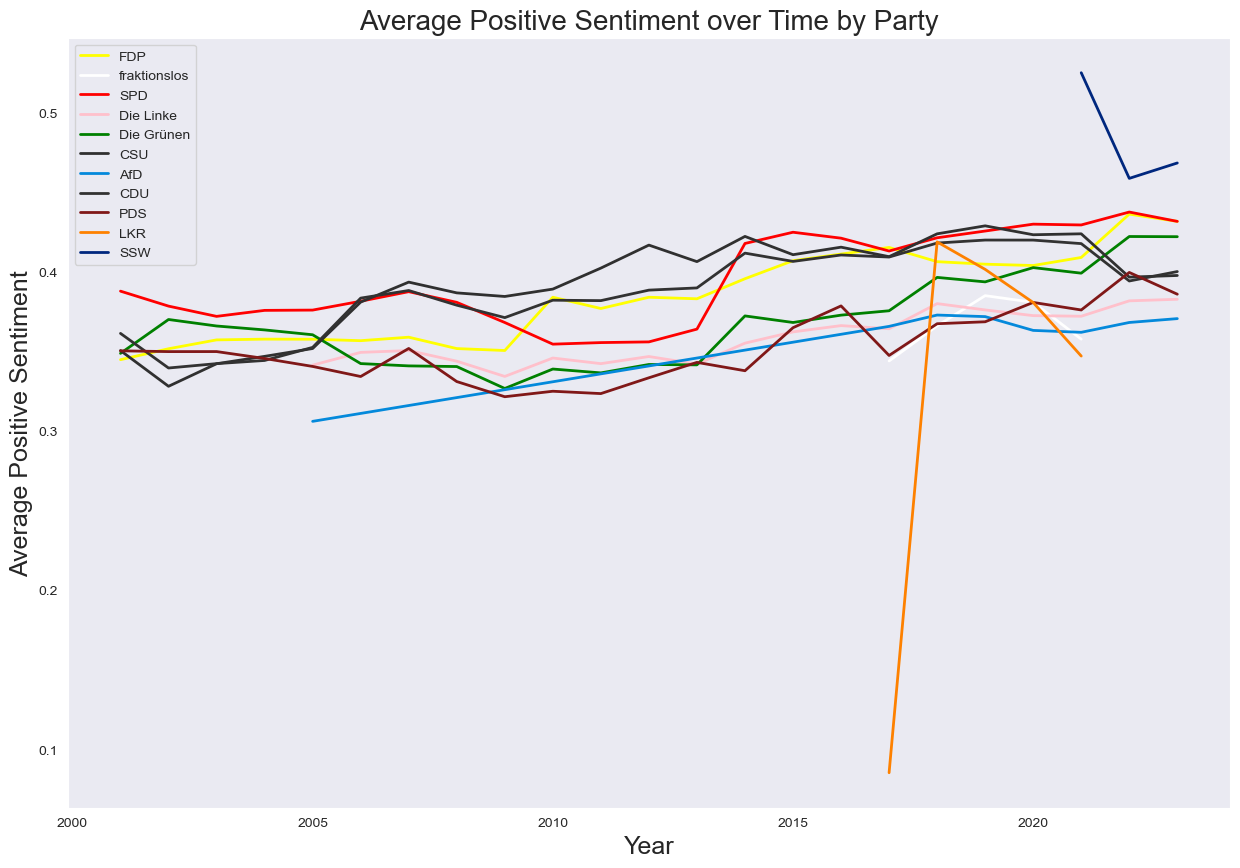

In [32]:
party_colors = {
    'SPD': 'red',
    'PDS': '#801818',
    'CDU': '#323232',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'CSU': '#303030',
    'AfD': '#0489DB',
    'Die Linke': 'pink',
    'fraktionslos': 'white',
    'LKR': '#FE8100',
    'SSW': '#00277E'
}
# Create a line plot for positive sentiment
plt.figure(figsize=(15, 10))
for party in df_sentiment['Fraktion_x'].unique():
    plt.plot(average_sent_over_time_pos_party.xs(party, level='Fraktion_x'), 
             color=party_colors[party], label=party, linewidth=2)
plt.grid(False)
plt.title("Average Positive Sentiment over Time by Party", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Average Positive Sentiment", fontsize=18)
plt.legend()
plt.show()

# Biggest Change Over Time for one person/ Party

# Most negative and positive people/ parties

In [19]:
# Find Average positiveness score per person
mean_pos = df_sentiment.groupby('Name')['positive'].mean().sort_values(ascending=False)
mean_neg = df_sentiment.groupby('Name')['negative'].mean().sort_values(ascending=False)

In [20]:
df_sentiment['neutral'].mean()

0.1613280612217155

In [22]:
mean_pos.head()

Name
Peter Harry Carstensen(Nordstrand)    0.940137
Christoph Ploß                        0.833299
Stefan Müller                         0.775443
Marlene Rupprecht                     0.753622
Willy Wimmer(Neuss)                   0.664388
Name: positive, dtype: float64

# Changes over the election cycle

# Opposition vs rest

# Start & Schluss Time